In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from xgboost import XGBRegressor


from scipy import stats
from scipy.stats import norm, skew

from sklearn.linear_model import LinearRegression

In [20]:
df = pd.read_csv("final_dataframe.csv")

In [21]:
X = df.drop("SalePrice", axis=1)
y = df["SalePrice"]

y = np.log1p(df["SalePrice"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ss = StandardScaler()
scaled_X_train = ss.fit_transform(X_train)
scaled_X_test = ss.transform(X_test)

/Users/markhurtado/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 180932.92 and sigma = 79467.79



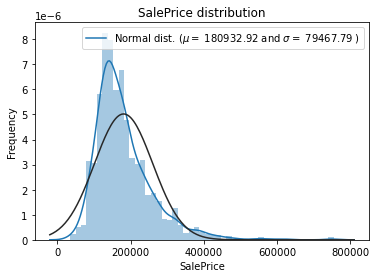

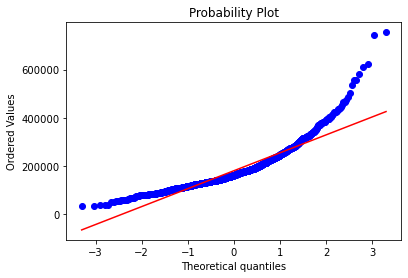

In [22]:
sns.distplot(df['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df['SalePrice'], plot=plt)
plt.show()

In [23]:
rfr = RandomForestRegressor()

rfr.fit(scaled_X_train, y_train)
y_pred0 = rfr.predict(scaled_X_train)
y_pred = rfr.predict(scaled_X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_pred0))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Train RMSE: {train_rmse}\nTest RMSE: {test_rmse}")

Train RMSE: 0.05183873578543982
Test RMSE: 0.1489383045864996


In [24]:
lasso = Lasso()

lasso.fit(X_train, y_train)
y_pred0 = lasso.predict(X_train)
y_pred = lasso.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_pred0))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Train RMSE: {train_rmse}\nTest RMSE: {test_rmse}")

Train RMSE: 0.19115798443621518
Test RMSE: 0.21083724650915142


In [25]:
gbr = GradientBoostingRegressor()

gbr.fit(scaled_X_train, y_train)
y_pred0 = gbr.predict(scaled_X_train)
y_pred = gbr.predict(scaled_X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_pred0))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Train RMSE: {train_rmse}\nTest RMSE: {test_rmse}")

Train RMSE: 0.07840943091025503
Test RMSE: 0.12989310992135716


In [26]:
xgb = XGBRegressor(objective='reg:squarederror', n_estimators=1000, learning_rate=0.01, max_depth=7) 

xgb.fit(X_train, y_train)
y_pred0 = xgb.predict(X_train)
y_pred = xgb.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_pred0))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Train RMSE: {train_rmse}\nTest RMSE: {test_rmse}")

Train RMSE: 0.037946821692188784
Test RMSE: 0.12810875271113922


In [27]:
lr= LinearRegression()
lr.fit(X_train, y_train)
y_pred0 = lr.predict(X_train)
y_pred = lr.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_pred0))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
print(f"Train RMSE: {train_rmse}\nTest RMSE: {test_rmse}")

Train RMSE: 0.0732491955734107
Test RMSE: 779.2517325669346


<AxesSubplot:>

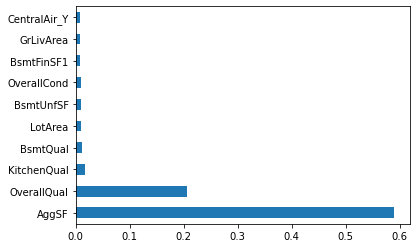

In [28]:
feat_importances = pd.Series(rfr.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')

## Parameter Tuning: Grid Search

In [29]:
gbr_parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'n_estimators' : [100,500,1000, 1500],
                  'max_depth'    : [4,6,8,10]
                 }

# grid_gbr = GridSearchCV(estimator= gbr, param_grid=gbr_parameters, cv=3, n_jobs=-1)

# grid_gbr.fit(scaled_X_train, y_train)

# print(" Results from Grid Search " )
# print("\n The best estimator across ALL searched params:\n",grid_gbr.best_estimator_)
# print("\n The best score across ALL searched params:\n",grid_gbr.best_score_)
# print("\n The best parameters across ALL searched params:\n",grid_gbr.best_params_)